# Project 7 BaseBall Case Sutdy Prediction
-->Aim of this project is to predict the number of wins of a team based on the input

## Importing the libraries

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Lets Load the dataset

In [22]:
data=pd.read_csv('Baseball.csv')
data.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


## Information of the data
-W Number of wins

-R Runs scored

-AB At bats

-H Hits by batters

-2B Double plays

-3B Triples plays

-HR Homeruns by batters

-BB Walks by batters

-SO Strikeouts

-SB Stolen Bases

-RA Runs Allowed 

-ER Earned Runs 

-ERA Earned Run Average (ERA)

-SHO Shutouts 

-SV Saves

-E Errors

In [23]:
data.shape

(30, 17)

## Lets check the null values

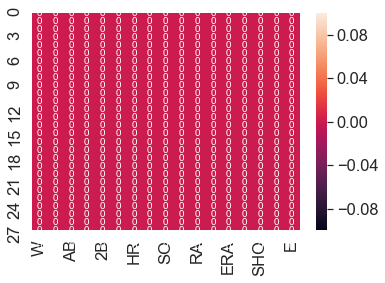

In [24]:
sns.heatmap(data.isnull(), annot=True)

In [25]:
data.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

From the above we can see that there are no null values in our dataset

## Statistical Summary

In [26]:
data.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


From the above summary we can see that most of features are evenly distributed, however there a significant difference between mean and standard deviation for SV and E feature

## Lets Check the Correlation of the data

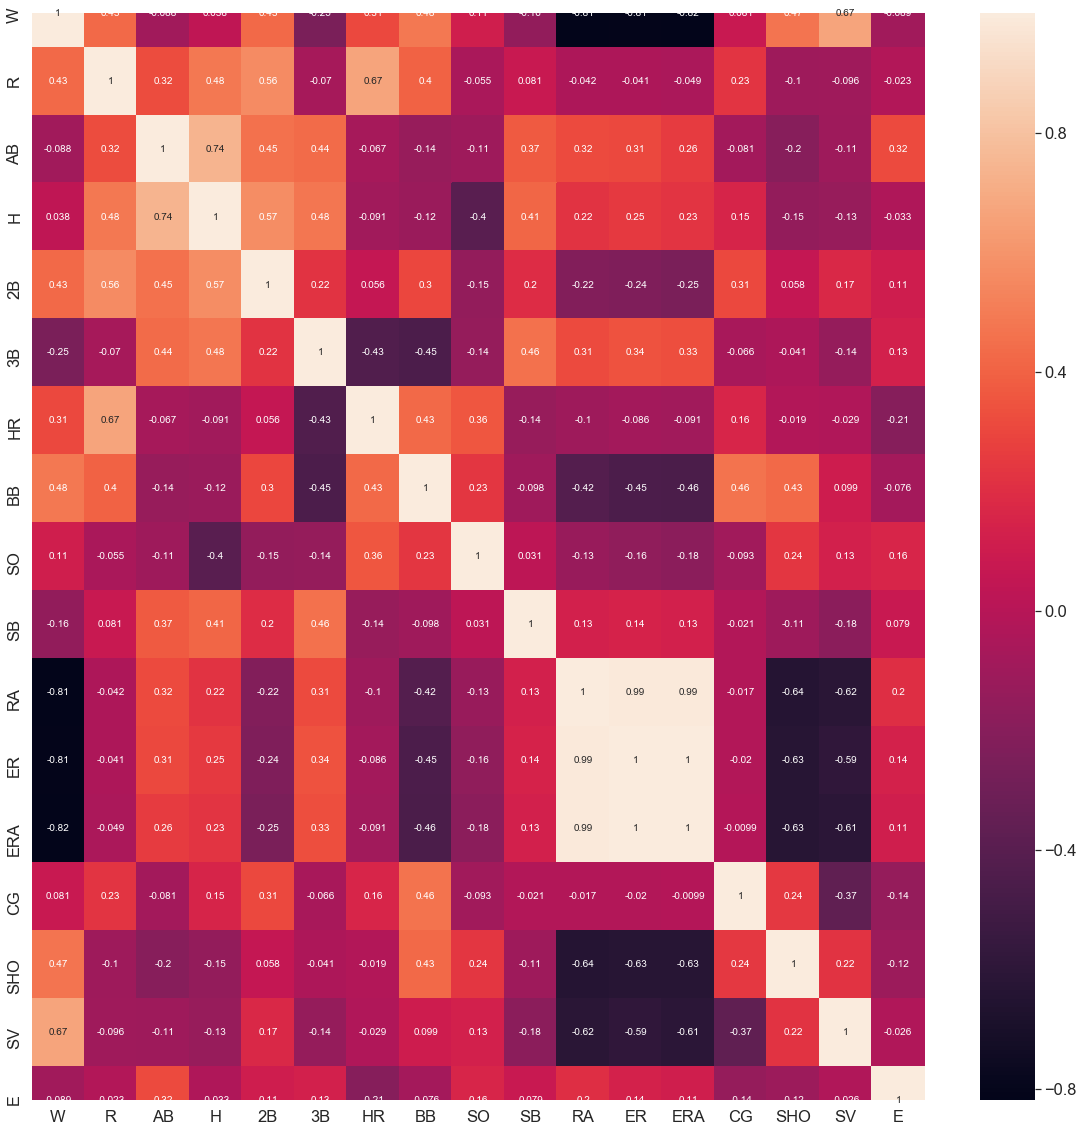

In [27]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot=True)

From the above correlation we can see that RA,ER,ERA features are highly correlated and AB and H also have a good correlation between them.

## Lets check the skewness

In [28]:
data.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

From the above we can see that few features have postive skewness greater that 0.55, so we have treat that skewness. 

In [29]:
for index in data.skew().index:
    if data.skew().loc[index]>0.5:
        data[index]=np.cbrt(data[index])

In [30]:
data.skew()

W      0.047089
R      0.892970
AB     0.183437
H      0.642599
2B    -0.230650
3B     0.129502
HR     0.175310
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG    -1.043632
SHO   -0.280283
SV     0.325143
E      0.719735
dtype: float64

## Lets do the EDA

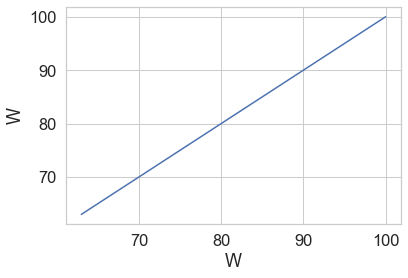

<Figure size 2160x2160 with 0 Axes>

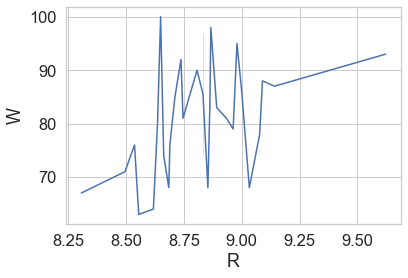

<Figure size 2160x2160 with 0 Axes>

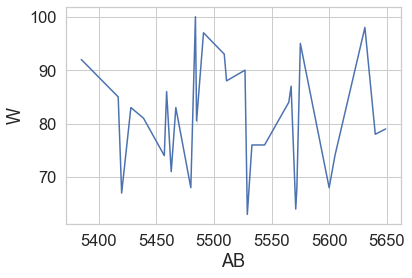

<Figure size 2160x2160 with 0 Axes>

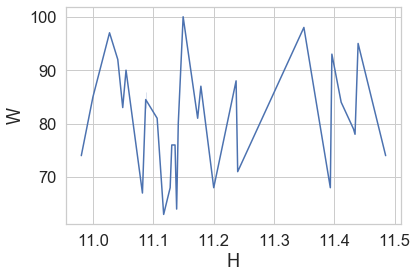

<Figure size 2160x2160 with 0 Axes>

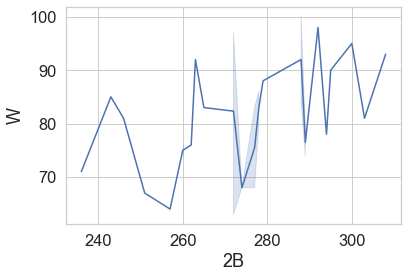

<Figure size 2160x2160 with 0 Axes>

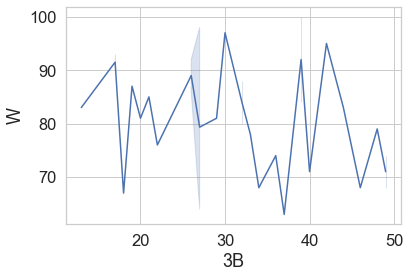

<Figure size 2160x2160 with 0 Axes>

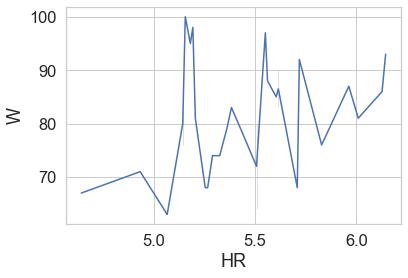

<Figure size 2160x2160 with 0 Axes>

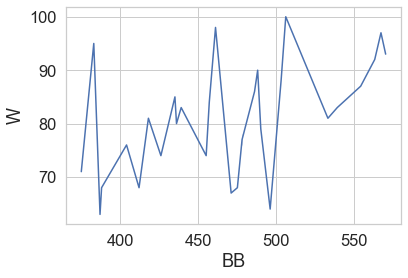

<Figure size 2160x2160 with 0 Axes>

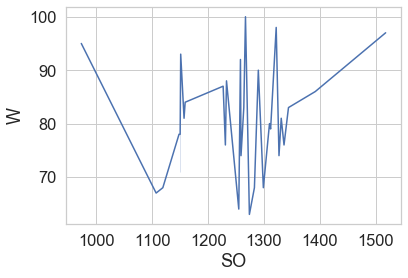

<Figure size 2160x2160 with 0 Axes>

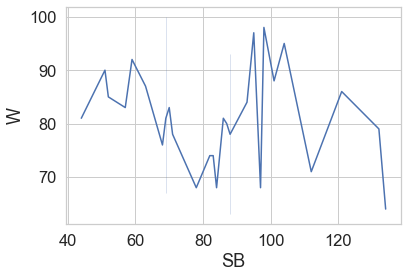

<Figure size 2160x2160 with 0 Axes>

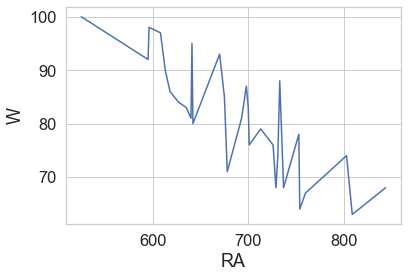

<Figure size 2160x2160 with 0 Axes>

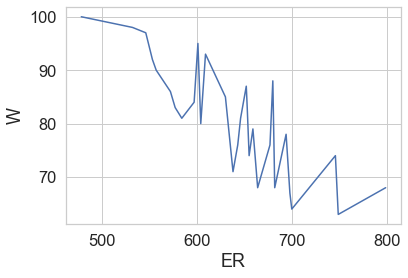

<Figure size 2160x2160 with 0 Axes>

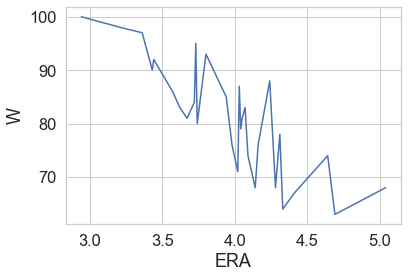

<Figure size 2160x2160 with 0 Axes>

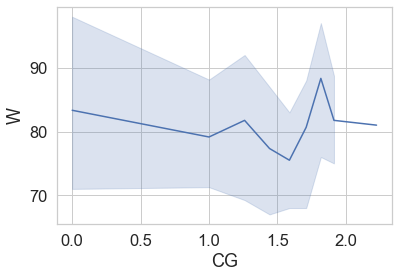

<Figure size 2160x2160 with 0 Axes>

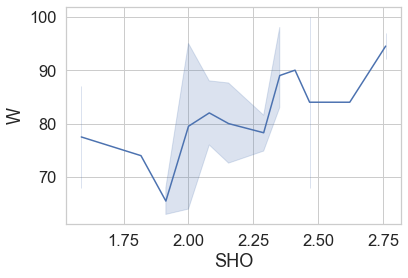

<Figure size 2160x2160 with 0 Axes>

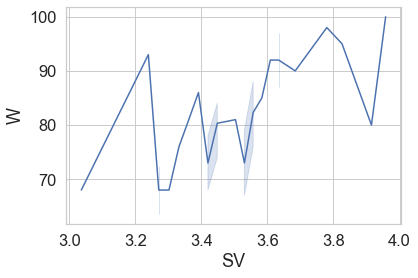

<Figure size 2160x2160 with 0 Axes>

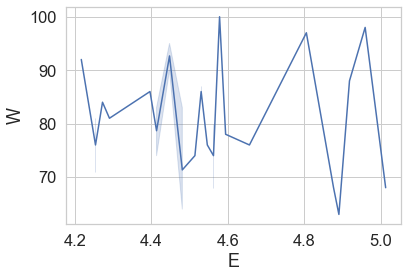

<Figure size 2160x2160 with 0 Axes>

In [31]:

for col in data:
    sns.lineplot(x=col,y='W',data=data)
    plt.figure(figsize=(30,30))
    plt.show()

From the above sets of graph we can see that R(Runs),HR(Home Runs), BB(walks) have postively linear relationship with wins, and RA(Runs allowed),ER(Earned Runs),ERA(Earned Runs average) have negative liner realtionship with wins


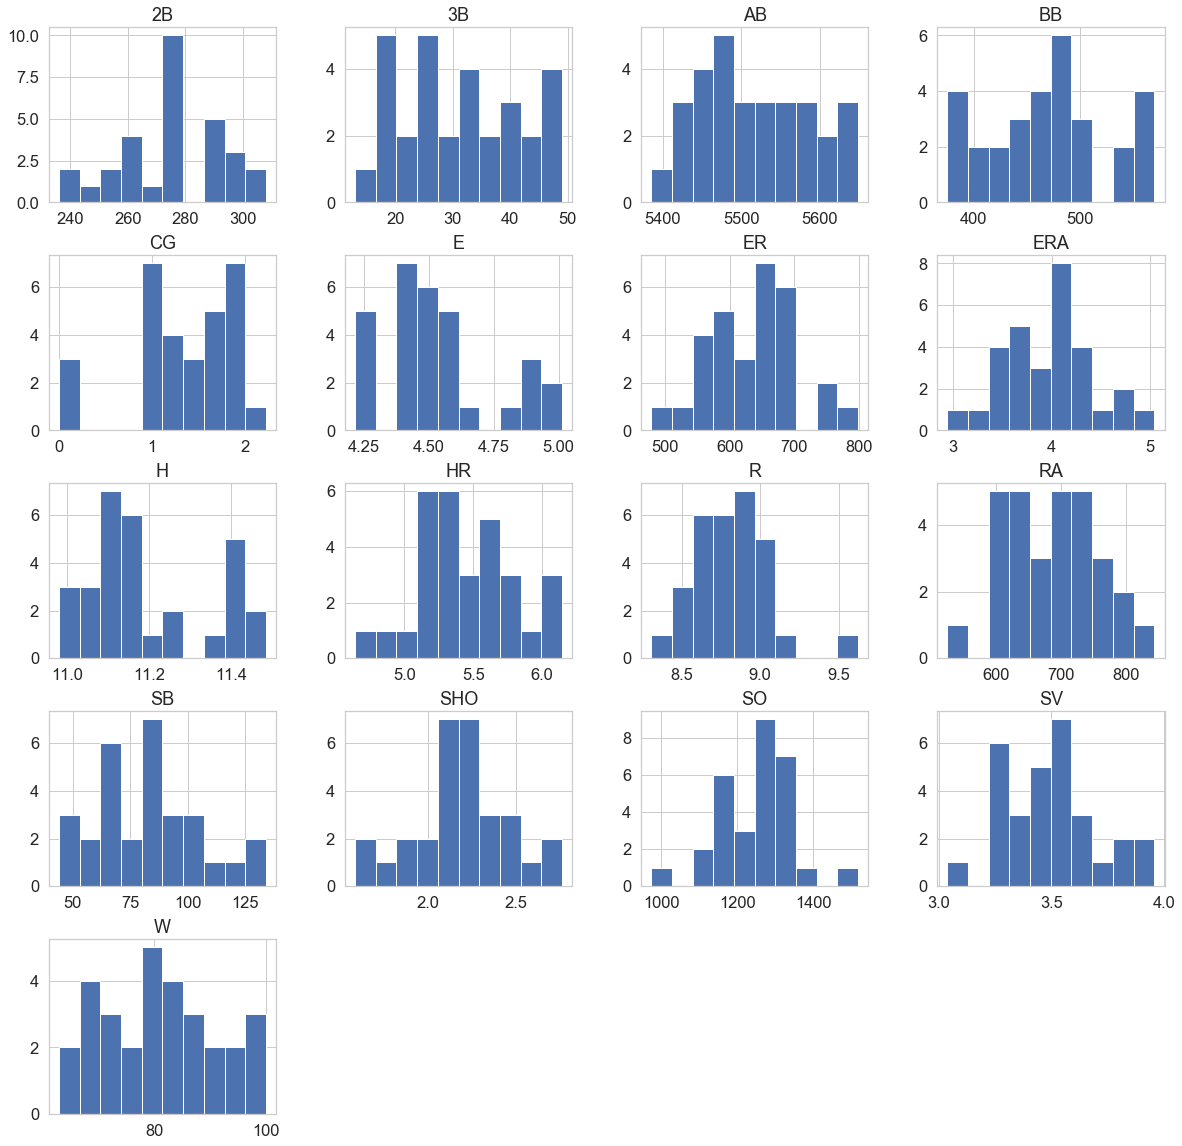

In [32]:
sns.set(style='whitegrid', palette="deep", font_scale=1.5)
data.hist(figsize=(20, 20));

From the above graph we can see that the most of the points are evenly distributed with mean but few features have postive and negative skewness

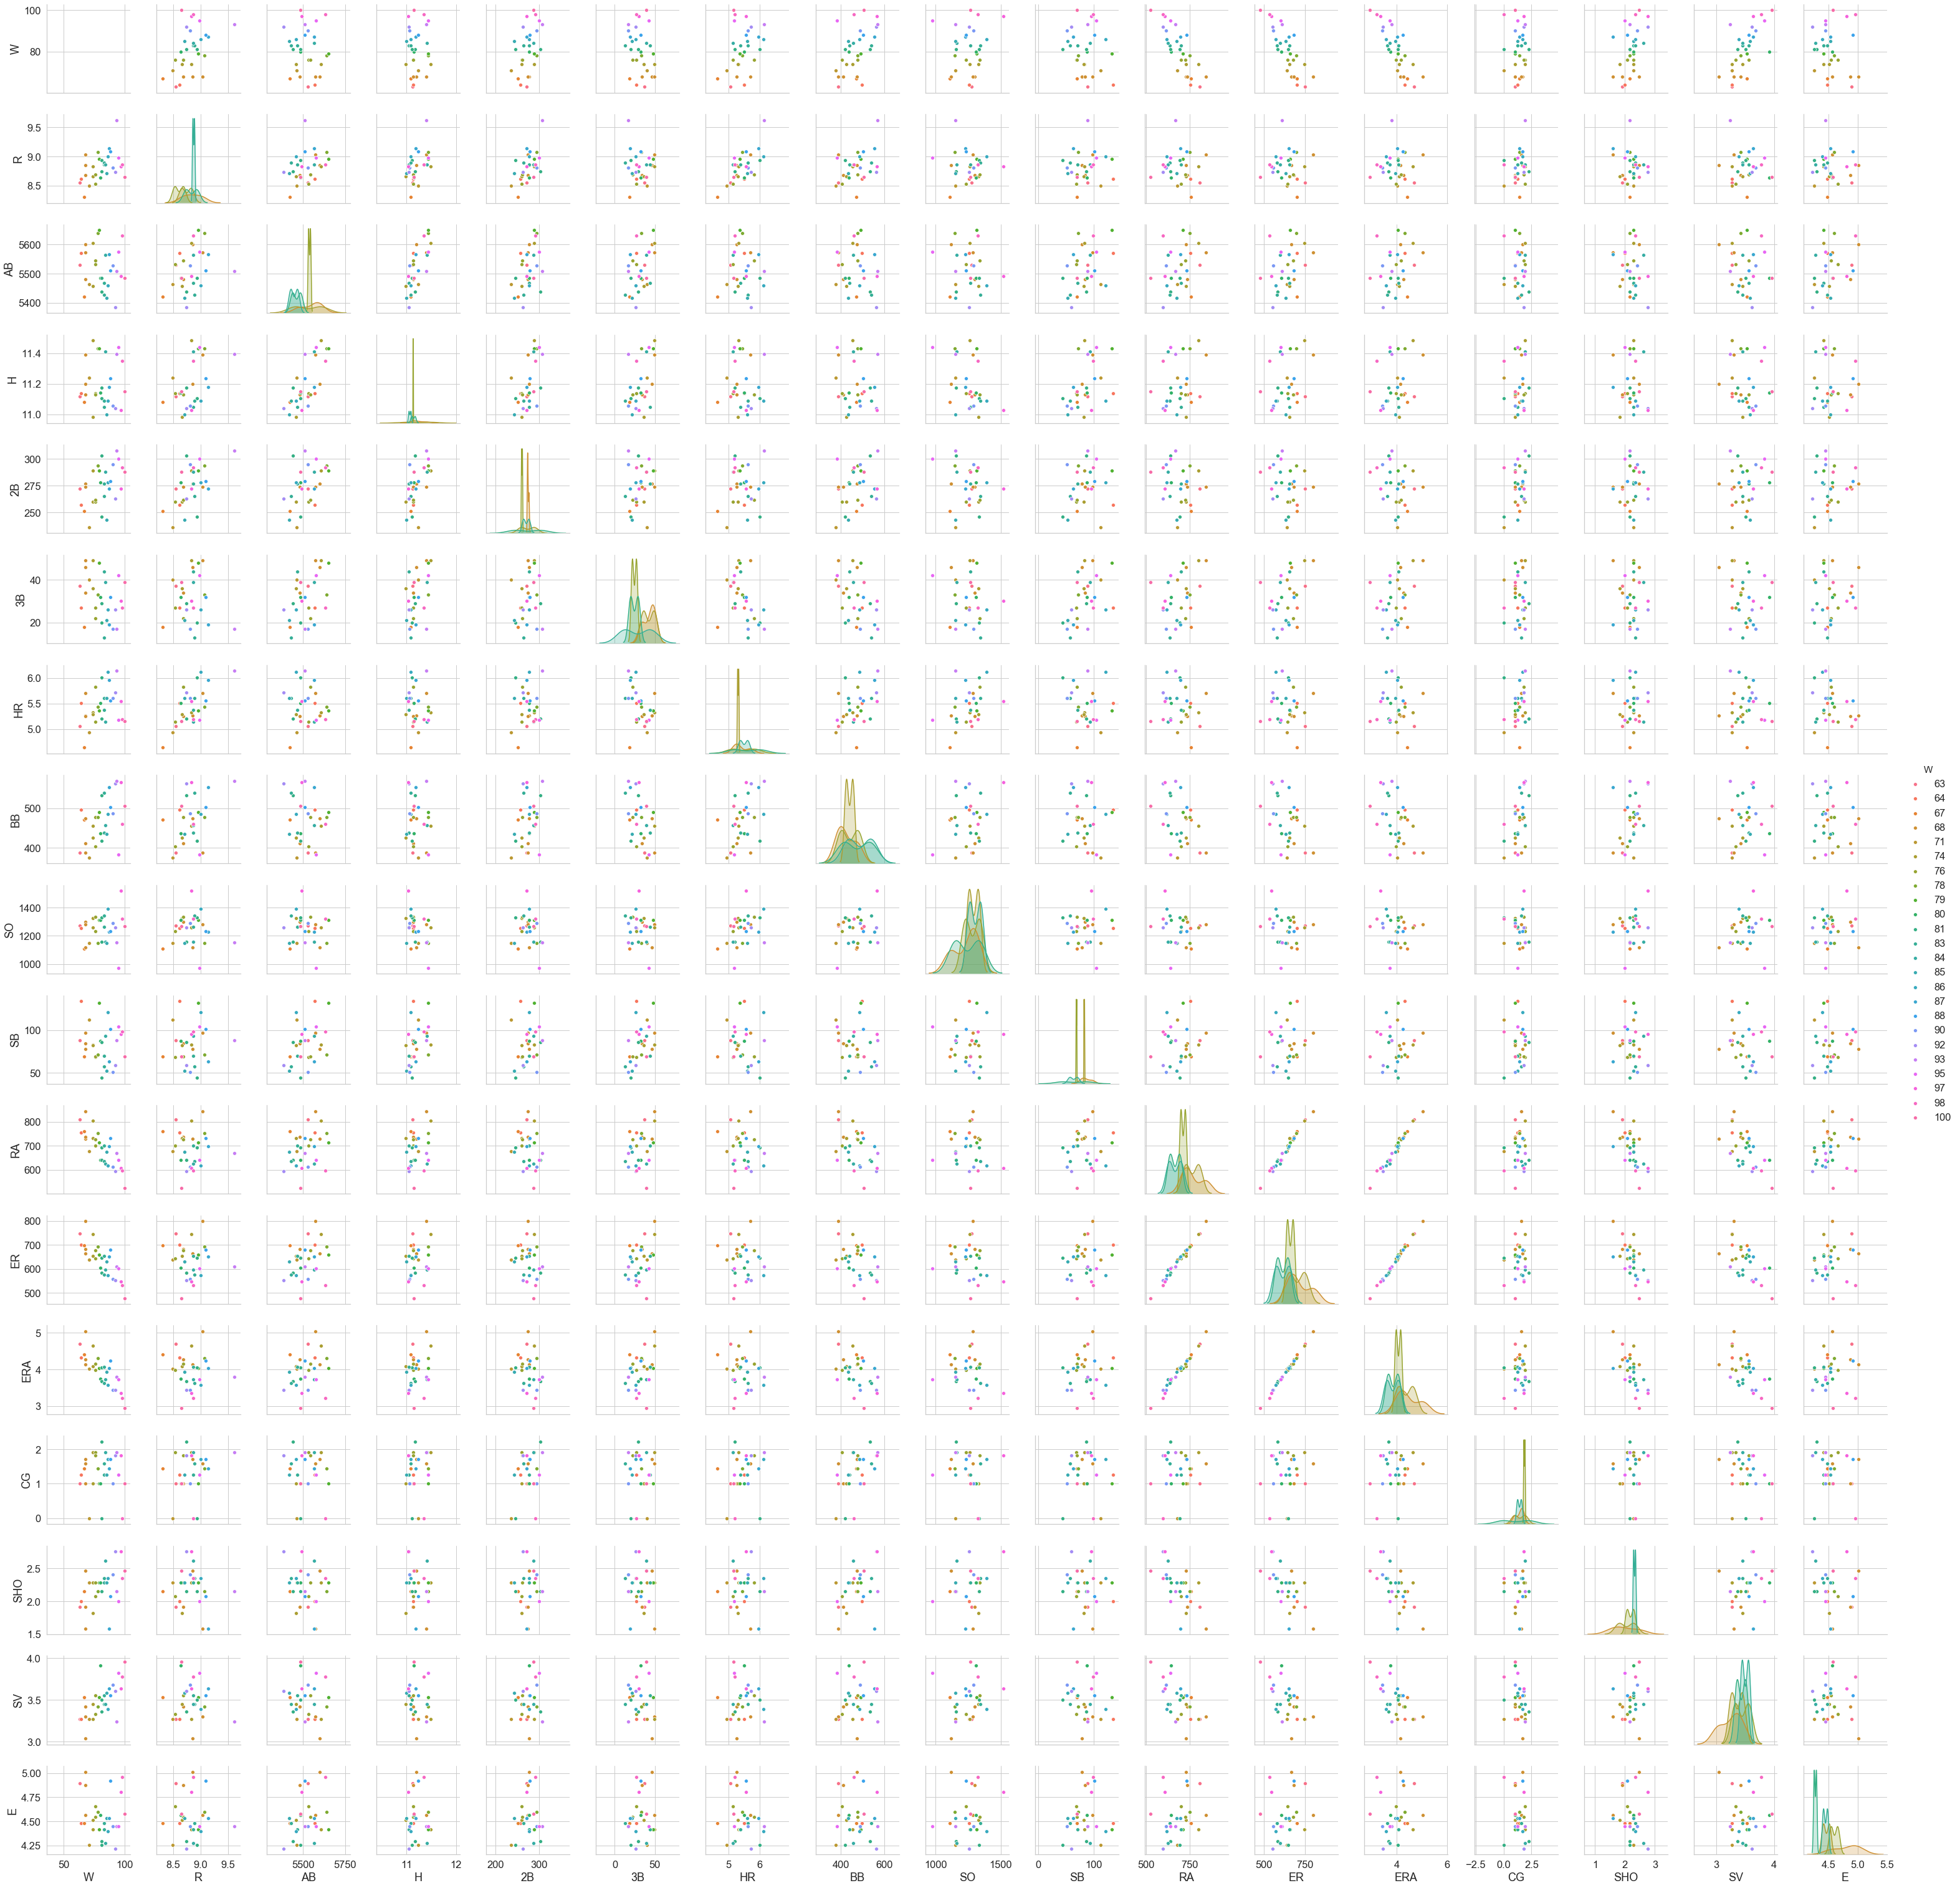

In [36]:
sns.pairplot(data,hue='W')

## Lets split and scale the data

In [39]:
x=data.iloc[:,1:]
x.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,8.979377,5575,11.439506,300,42,5.180101,383,973,104,641,601,3.73,1.259921,2.000000,3.825862,4.447960
1,8.862095,5467,11.049365,277,44,5.383213,439,1264,70,700,653,4.07,1.259921,2.289428,3.556893,4.414005
2,8.745985,5439,11.173556,303,29,5.204828,533,1157,86,640,584,3.67,2.223980,2.154435,3.361975,4.290840
3,8.536178,5533,11.136051,260,27,5.142563,404,1231,68,701,643,3.98,1.912931,2.080084,3.332222,4.657010
4,8.832285,5605,11.485173,289,49,5.325074,455,1259,83,803,746,4.64,1.912931,2.289428,3.271066,4.414005


In [40]:
y=data['W']
y.head()

0    95
1    83
2    81
3    76
4    74
Name: W, dtype: int64

In [42]:
from sklearn.preprocessing import  StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [93]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=48)

In [94]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((24, 16), (24,), (6, 16), (6,))

## Lets Implement ML Algorithm

In [95]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [96]:
LR=LinearRegression()
LA=Lasso()
RI=Ridge()
KN=KNeighborsRegressor()
SV=SVR()
DTR=DecisionTreeRegressor(random_state=48)
GBR=GradientBoostingRegressor(random_state=48)
ABR=AdaBoostRegressor(random_state=48)
RFR=RandomForestRegressor(random_state=48)

In [97]:
models=[]
models.append(("LinearRegression",LR))
models.append(("Lasso",LA))
models.append(("Ridge",RI))
models.append(("KNeighborsRegressor",KN))
models.append(("SupportVectorRegressor",SV))
models.append(("DecisionTreeRegressor",DTR))
models.append(("GradientBoostingRegressor",GBR))
models.append(("AdaBoostRegressor",ABR))
models.append(("RandomForestRegressor",RFR))

In [102]:
Model=[]
R2_score=[]
CVS=[]
MAE=[]
MSE=[]
RMSE=[]
for name,model in models:
    print("-------------------------->",name,"<---------------------")
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    pr=model.predict(x_test)
    r2=r2_score(y_test,pr)
    print("R2_score =",r2)
    R2_score.append(r2)
    mse=mean_squared_error(y_test,pr)
    print("Mean_Squared_Error =",mse)
    MSE.append(mse)
    mae=mean_absolute_error(y_test,pr)
    print("Mean_Absolute_Error =",mae)
    MAE.append(mae)
    rmse=np.sqrt(mse)
    print("Mean_Sqaured_Error =",rmse)
    RMSE.append(rmse)
    score= cross_val_score(model,x,y,cv=8,scoring='r2').mean()
    print("Cross_val_score =",score)
    CVS.append(score)
    print('\n')

--------------------------> LinearRegression <---------------------


R2_score = 0.8612283266146769
Mean_Squared_Error = 20.075635416410083
Mean_Absolute_Error = 3.850435857369837
Mean_Sqaured_Error = 4.480584271767476
Cross_val_score = 0.20561264058436296


--------------------------> Lasso <---------------------


R2_score = 0.9293842004703242
Mean_Squared_Error = 10.215752331959768
Mean_Absolute_Error = 2.617228006159612
Mean_Sqaured_Error = 3.1962090563603263
Cross_val_score = 0.6366925968262376


--------------------------> Ridge <---------------------


R2_score = 0.9428981956586724
Mean_Squared_Error = 8.260727694712063
Mean_Absolute_Error = 2.542259796602527
Mean_Sqaured_Error = 2.8741481685382997
Cross_val_score = 0.5155257458046358


--------------------------> KNeighborsRegressor <---------------------


R2_score = 0.7082488479262672
Mean_Squared_Error = 42.20666666666668
Mean_Absolute_Error = 5.7
Mean_Sqaured_Error = 6.496665811527223
Cross_val_score = 0.20257520378141455



In [103]:
result = pd.DataFrame({'Model': Model, 'R2_score': R2_score ,'Mean_Squared_Error' :MSE,'Mean_Absolute_Error' :MAE,'Root_Mean_Squared_Error' :RMSE,'Cross_val_score':CVS})
result

,Model,R2_score,Mean_Squared_Error,Mean_Absolute_Error,Root_Mean_Squared_Error,Cross_val_score
0,LinearRegression,0.861228,20.075635,3.850436,4.480584,0.205613
1,Lasso,0.929384,10.215752,2.617228,3.196209,0.636693
2,Ridge,0.942898,8.260728,2.542260,2.874148,0.515526
3,KNeighborsRegressor,0.708249,42.206667,5.700000,6.496666,0.202575
4,SupportVectorRegressor,0.144144,123.813800,9.223257,11.127165,-0.330137
5,DecisionTreeRegressor,0.296083,101.833333,9.500000,10.091250,-1.599877
6,GradientBoostingRegressor,0.495286,73.015343,7.128313,8.544902,-0.932291
7,AdaBoostRegressor,0.701449,43.190427,5.037879,6.571942,-0.277771
8,RandomForestRegressor,0.587477,59.678333,6.483333,7.725175,-0.500932


From the above we can see that both ensemble techniques Ridge and Lasso are working good giving use more that 90% of accuracy score but we  choose Ridge as it gives us highest R2_score and lowest Mean_Squared_Error.

In [104]:
from sklearn.externals import joblib
joblib.dump(RI,"Baseball Prediction.obj")

F:\Anaconda\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['Baseball Prediction.obj']

In [105]:
model=joblib.load("BaseBall Prediction.obj")

In [106]:
model.predict(x_test)

array([ 86.53687077,  72.91279572,  73.17062399,  61.34522603,
        81.28751812, 101.09160388])